# Identifying the outliers using spectral clustering

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Visualisation

In [20]:
try:
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
except ImportError:
    %pip install scikit-learn
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA


In [21]:
df = pd.read_csv('data/data.csv')
df = df[:100]                                       # TODO: remove this line
n, d = df.shape
print('n =', n, 'd =', d)

n = 100 d = 10


### 2D plot of the data

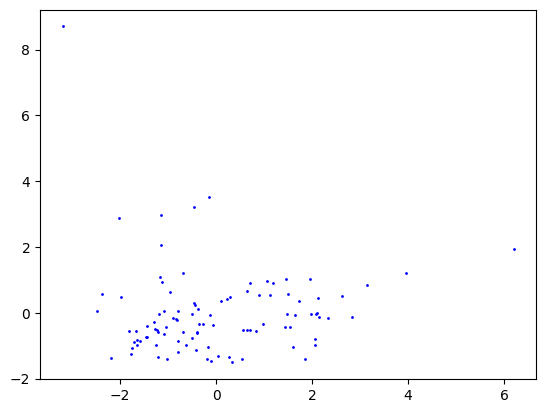

42.22

In [22]:
normalized_df = StandardScaler().fit_transform(df)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_df)

plt.scatter(principal_components[:, 0], principal_components[:, 1], c='b', marker='o', s= 1)
plt.show()


# # Show 3d plot
# pca = PCA(n_components=3)
# principal_components = pca.fit_transform(normalized_df)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c='r', marker='o', s= 1)
# plt.show()



round(sum(list(pca.explained_variance_ratio_))*100, 2)

## Generating Adjaency Matrix

### Weighted Adjacency Matrix

In [23]:
A = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.exp(-np.linalg.norm(df.iloc[i, :] - df.iloc[j, :])**2/2)

D = np.diag(np.sum(A, axis=1))
L = D - A
L.shape

(100, 100)

### $\epsilon$-neighborhood

### k-nearest neighbor